In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objects as go

%matplotlib inline 
import warnings                   
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = (12, 7)


In [2]:
subdivision_df = pd.read_csv("rainfall in india 1901-2015.csv")
subdivision_df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [3]:
subdivision_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [4]:
## creating time series df for each subdivison
groups= subdivision_df.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','NOV','DEC']

ts_data = {}
for sd in subdivision_df["SUBDIVISION"].unique():
    data=groups.get_group((sd))
    data=data.melt(['YEAR']).reset_index()
    df= data[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
    df.columns=['INDEX','YEAR','Month','avg_rainfall']
    d={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
       'OCT':10,'NOV':11,'DEC':12}
    df['Month']=df['Month'].map(d)
    df['Date']=pd.to_datetime(df.assign(Day=1).loc[:,['YEAR','Month','Day']])
    ts_data[sd]=df


## Prediction on kerala subdivision

In [11]:
kerala_df = ts_data['PUNJAB']
kerala_df.head()

df = pd.DataFrame({'date':kerala_df['Date'],'rainfall':kerala_df['avg_rainfall']})
df.index = df.date
df

,date,rainfall
date,,
1901-01-01,1901-01-01,55.7
1901-02-01,1901-02-01,50.1
1901-03-01,1901-03-01,25.2
1901-04-01,1901-04-01,2.1
1901-05-01,1901-05-01,25.2
...,...,...
2015-07-01,2015-07-01,130.2
2015-08-01,2015-08-01,88.6
2015-09-01,2015-09-01,69.2


In [12]:
kerala_df.columns

Index(['INDEX', 'YEAR', 'Month', 'avg_rainfall', 'Date'], dtype='object')

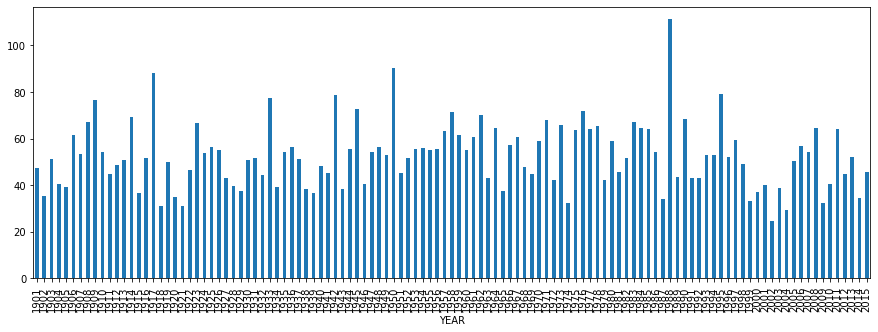

In [13]:
plt.figure(figsize=(15,5))
kerala_df.groupby('YEAR')['avg_rainfall'].mean().plot.bar();

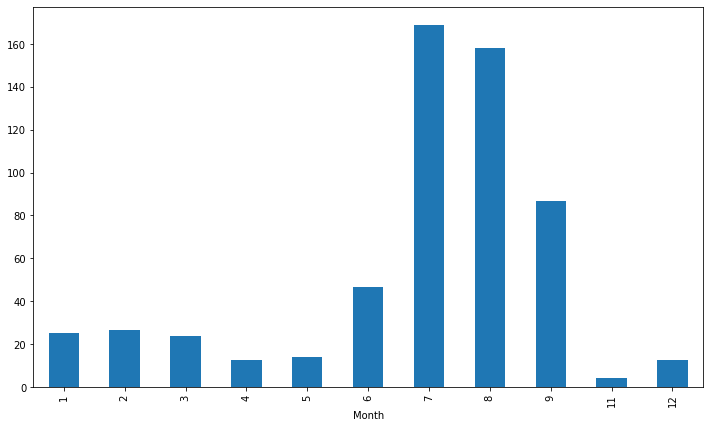

In [14]:
kerala_df.groupby('Month')['avg_rainfall'].mean().plot.bar();

## Splitting into train,validation and test set

In [15]:

train_df = df[(df.index <= '1995-12-01')]
val_df = df[(df.index > '1995-12-01') & (df.index <= '2005-12-01') ]
test_df = df[df.index > '2005-12-01']

len(train_df),len(val_df),len(test_df)

(1045, 110, 110)

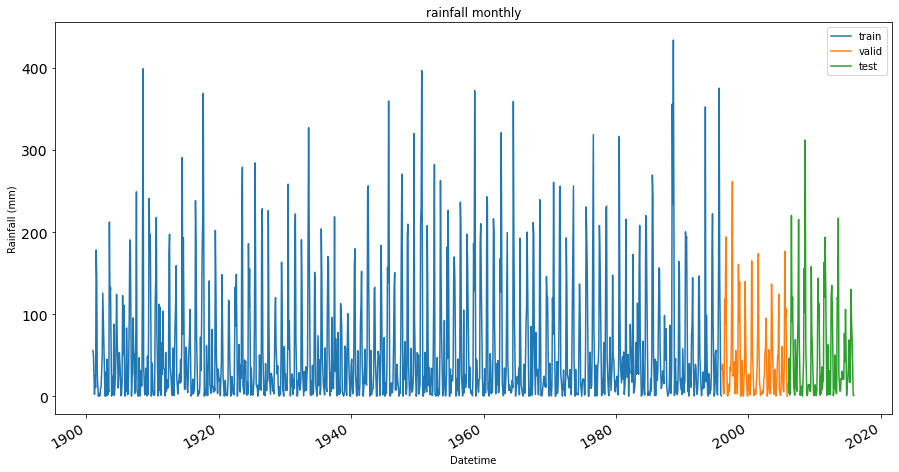

In [16]:
train_df["rainfall"].plot(figsize=(15,8), title= 'rainfall monthly', fontsize=14, label='train') 
val_df["rainfall"].plot(figsize=(15,8), title= 'rainfall monthly', fontsize=14, label='valid')
test_df["rainfall"].plot(figsize=(15,8), title= 'rainfall monthly', fontsize=14, label='test')
plt.xlabel("Datetime") 
plt.ylabel("Rainfall (mm)") 
plt.legend(loc='best') 
plt.show()

## Metrics is rmse,mse

In [17]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 

## Decomposition of TS

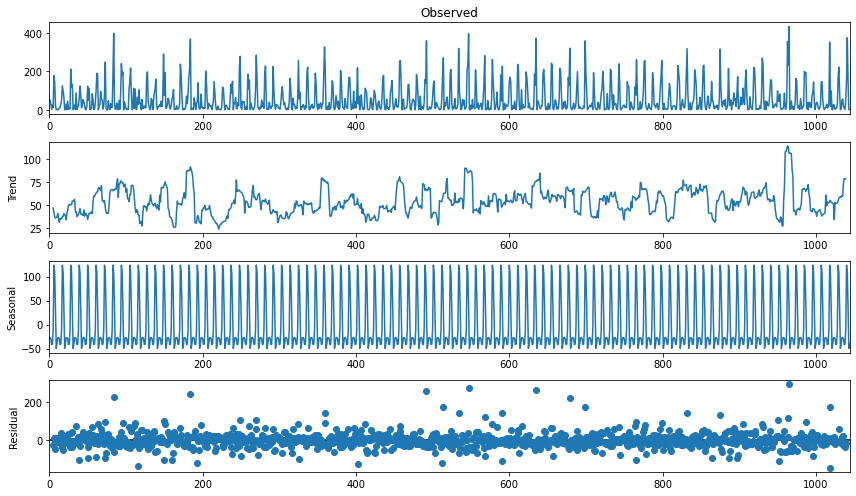

In [18]:
## Visualizing Time Series Components
import statsmodels.api as sm

sm.tsa.seasonal_decompose(train_df['rainfall'].values,period=11).plot()
plt.show()

## 1. Moving Average
- In this technique we take the average of the rainfall for last few time periods only.
- Taking ma of last 10 years i.e 110 observations 11*10 cause 1 month has None value i.e november

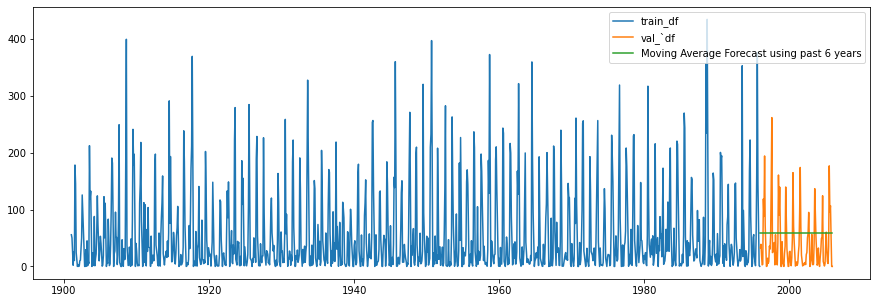

RMSE for Moving Avergae: 53.76132473433


In [19]:
y_hat_avg = val_df.copy() 
y_hat_avg['moving_avg_forecast'] = train_df['rainfall'].rolling(110).mean().iloc[-1]
plt.figure(figsize=(15,5)) 
plt.plot(train_df['rainfall'], label='train_df') 
plt.plot(val_df['rainfall'], label='val_`df') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using past 6 years') 
plt.legend(loc='best') 
plt.show() 

rmse = sqrt(mean_squared_error(val_df.rainfall, y_hat_avg.moving_avg_forecast)) 
print(f"RMSE for Moving Avergae: {rmse}")

## Baseline model

## 2. Holt

Holt-Winter’s Exponential Smoothing as named after its two contributors: Charles Holt and Peter Winter’s is one of the oldest time series analysis techniques which takes into account the trend and seasonality while doing the forecasting. This method has 3 major aspects for performing the predictions. It has an average value with the trend and seasonality. The three aspects are 3 types of exponential smoothing and hence the hold winter’s method is also known as triple exponential smoothing.

Let us look at each of the aspects in detail.

Exponential Smoothing: Simple exponential smoothing as the name suggest is used for forecasting when the data set has no trends or seasonality.

Holt’s Smoothing method: Holt’s smoothing technique, also known as linear exponential smoothing, is a widely known smoothing model for forecasting data that has a trend.

Winter’s Smoothing method: Winter’s smoothing technique allows us to include seasonality while making the prediction along with the trend.

Hence the Holt winter’s method takes into account average along with trend and seasonality while making the time series prediction.

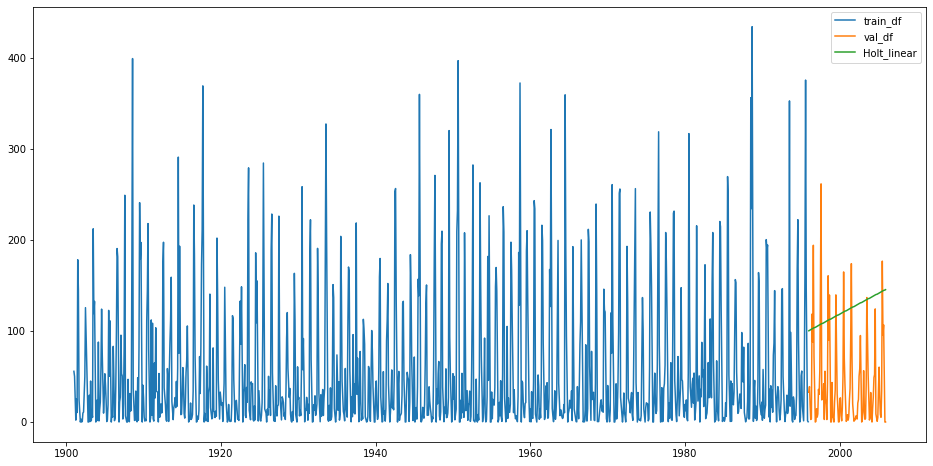

RMSE for Holt = 97.63760223372138


In [26]:
from statsmodels.tsa.holtwinters import Holt

y_hat_avg = val_df.copy() 
fit1 = Holt(np.asarray(train_df['rainfall']),initialization_method='heuristic').fit(smoothing_level = 0.3,smoothing_slope = 0.2
                                                                                   ) 
y_hat_avg['Holt_linear'] = fit1.forecast(len(val_df)) 
plt.figure(figsize=(16,8)) 
plt.plot(train_df['rainfall'], label='train_df') 
plt.plot(val_df['rainfall'], label='val_df') 
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()


rms = sqrt(mean_squared_error(val_df.rainfall, y_hat_avg.Holt_linear)) 
print(f'RMSE for Holt = {rms}')

## It actually performs badly than baseline because the ts has no trends as such but only seasonality  

## 3. Exponential Smoothening
- Here the predictions are made by assigning larger weight to the recent values and lesser weight to the old values.
- Exponential smoothing is a rule of thumb technique for smoothing time series data using the exponential window function. Whereas in the simple moving average the past observations are weighted equally, exponential functions are used to assign exponentially decreasing weights over time

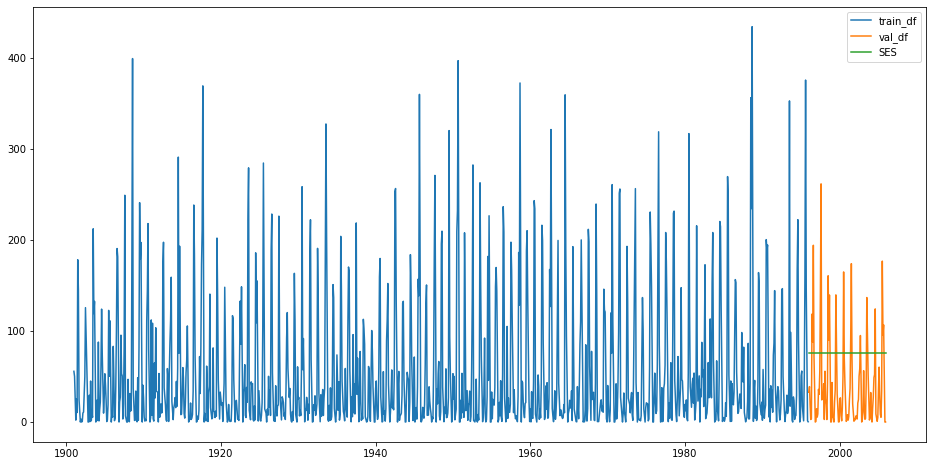

RMSE for Exponential Smoothening: 61.46294410996237


In [27]:
## Simple Exponential Smoothing is used for time series prediction when the data particularly  
## does not follow any trend or seasonality:

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

y_hat_avg = val_df.copy() 
val = np.asarray(train_df['rainfall'])
fit2 = SimpleExpSmoothing(val, initialization_method="heuristic").fit(smoothing_level=0.1, optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(val_df)) 
plt.figure(figsize=(16,8)) 
plt.plot(train_df['rainfall'], label='train_df') 
plt.plot(val_df['rainfall'], label='val_df') 
plt.plot(y_hat_avg['SES'], label='SES') 
plt.legend(loc='best') 
plt.show()


rms = sqrt(mean_squared_error(val_df.rainfall, y_hat_avg.SES)) 
print(f'RMSE for Exponential Smoothening: {rms}')

# The fit of the model is better than above but not better than baseline as SimeExpSmoothing assigns
# weights and ts has no trend so it behaves like moving average. So we need to consider seasonality 

In [29]:
## For testdataframe
preds.iloc[:12,1:]

,rainfall,ES
date,,
2006-01-01,15.0,24.880774
2006-02-01,3.7,29.993134
2006-03-01,46.1,27.224531
2006-04-01,1.3,14.466368
2006-05-01,32.1,17.675935
2006-06-01,73.0,46.912400
2006-07-01,220.3,190.193874
2006-08-01,90.8,175.939097
2006-09-01,120.7,93.384665


In [30]:
## For validation dataframe
y_hat_avg.iloc[:12,1:]

,rainfall,ES
date,,
1996-01-01,32.7,24.880774
1996-02-01,38.9,29.993134
1996-03-01,19.0,27.224531
1996-04-01,2.8,14.466368
1996-05-01,3.7,17.675935
1996-06-01,118.6,46.912400
1996-07-01,87.9,190.193874
1996-08-01,194.1,175.939097
1996-09-01,72.4,93.384665


In [31]:
sum(y_hat_avg.iloc[:12,1:]['rainfall']),sum(y_hat_avg.iloc[:12,1:]['ES'])

(585.3000000000001, 667.3726066913557)

## Checking statinarity of the series

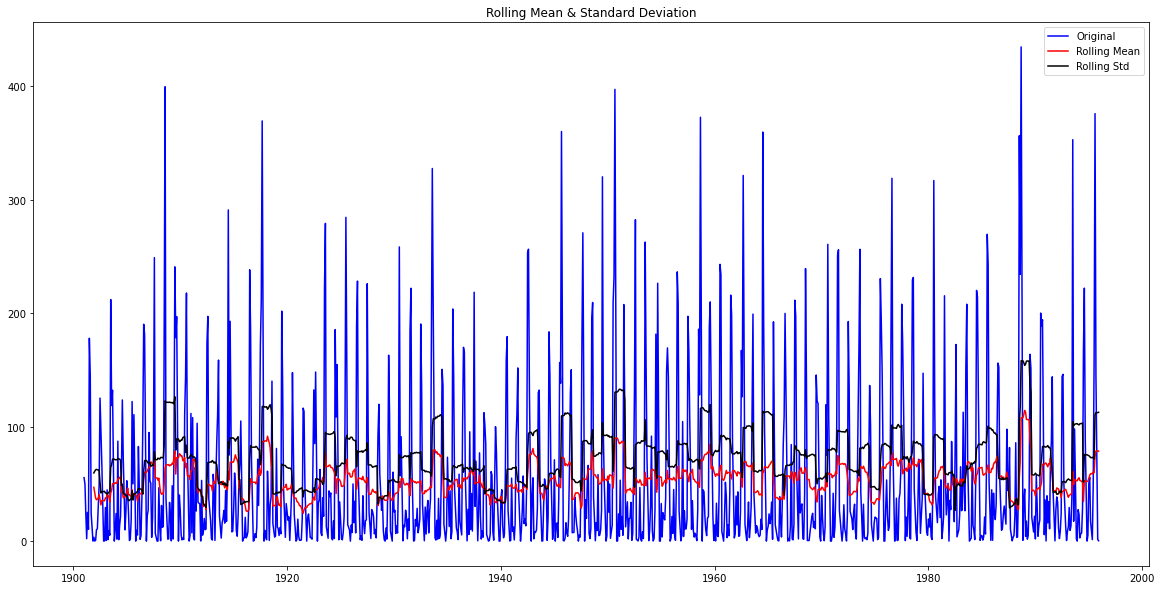

ADF Test Statistic : -5.797114219532907
p-value : 4.723705391631151e-07
#Lags Used : 22
Number of Observations Used : 1022
Strong evidence against the null hypothesis(Ho), reject the null hypothesis.Time Series is stationary


In [32]:
## Checkimg Stationarity of the series

from statsmodels.tsa.stattools import adfuller 

def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(11).mean() # 24 hours on each day
    rolstd = timeseries.rolling(11).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
        
    #Perform Dickey-Fuller test:
    result=adfuller(timeseries)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis.Time Series is stationary")
    else:
        print("Weak evidence against null hypothesis, Time Series is non-stationary ")


from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10
test_stationarity(train_df['rainfall'])

## Since the series is stationary we can go ahead with the forecasting

## 4. ARIMA

### Introduction to ARIMA model
- ARIMA stands for Auto Regression Integrated Moving Average.
- It is specified by three ordered parameters (p,d,q).
- Here p is the order of the autoregressive model(number of time lags)
- d is the degree of differencing(number of times the data have had past values subtracted)
- q is the order of moving average model. 

The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation.

### What is a stationary time series?
There are three basic criterion for a series to be classified as stationary series :

- The mean of the time series should not be a function of time. It should be constant.
- The variance of the time series should not be a function of time.
- The covariance of the ith term and the (i+m)th term should not be a function of time.

### Why do we have to make the time series stationary?
We make the series stationary to make the variables independent. Variables can be dependent in various ways, but can only be independent in one way. So, we will get more information when they are independent. Hence the time series must be stationary.

If the time series is not stationary, firstly we have to make it stationary. For doing so, we need to remove the trend and seasonality from the data.

RMSE for ARIMA for validation: 39.1137569490357
RMSE for ARIMA for test: 38.50240337341426


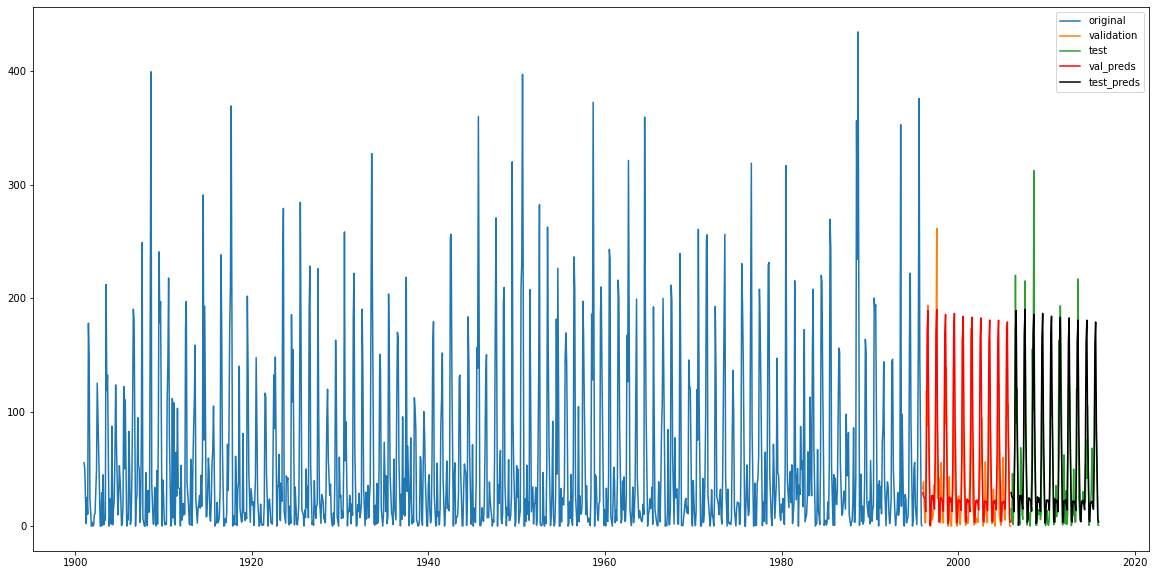

In [35]:
from statsmodels.tsa.arima.model import ARIMA
import warnings                  
warnings.filterwarnings("ignore")

model = ARIMA(train_df['rainfall'], order=(11,0,11))  # p,d,q
results_ARIMA = model.fit()  

val_pred = val_df.copy()
preds = test_df.copy()

val_pred['val_forecast'] = results_ARIMA.forecast(len(val_df),alpha=0.05).values
preds['forecast'] = results_ARIMA.forecast(len(test_df),alpha=0.05).values


plt.plot(train_df['rainfall'].dropna(),  label='original') 
plt.plot(val_df['rainfall'].dropna(),  label='validation') 
plt.plot(test_df['rainfall'].dropna(),  label='test') 

plt.plot(val_pred['val_forecast'], color='red', label='val_preds') 
plt.plot(preds['forecast'], color='black', label='test_preds')

plt.legend(loc='best') 

rms_val = sqrt(mean_squared_error(val_df.rainfall, val_pred.val_forecast)) 
rms_test = sqrt(mean_squared_error(test_df.rainfall, preds.forecast)) 

print(f'RMSE for ARIMA for validation: {rms_val}')
print(f'RMSE for ARIMA for test: {rms_test}')

plt.show();

## As we see here once we consider trends , seasonality and lags now the predictions oscilllate
## as per the seasonality and the rmse is lowest from above all methods for p,d,q of 11,0,11

In [36]:
## for validation
val_pred.sample(20)

,date,rainfall,val_forecast
date,,,
2001-07-01,2001-07-01,173.9,163.426355
2004-08-01,2004-08-01,124.2,180.888691
2002-08-01,2002-08-01,58.4,182.874066
2002-06-01,2002-06-01,24.7,62.614845
1999-08-01,1999-08-01,82.0,186.805536
2005-05-01,2005-05-01,5.2,14.839396
2000-11-01,2000-11-01,0.7,4.065250
2000-02-01,2000-02-01,26.6,22.506307
1996-05-01,1996-05-01,3.7,12.618232


In [38]:
preds.head(24)

,date,rainfall,forecast
date,,,
2006-01-01,2006-01-01,15.0,29.491912
2006-02-01,2006-02-01,3.7,25.860078
2006-03-01,2006-03-01,46.1,25.412606
2006-04-01,2006-04-01,1.3,24.161857
2006-05-01,2006-05-01,32.1,12.618232
2006-06-01,2006-06-01,73.0,63.902528
2006-07-01,2006-07-01,220.3,171.849601
2006-08-01,2006-08-01,90.8,189.333063
2006-09-01,2006-09-01,120.7,95.704106


## Conclusion
- Moving average was the baseline model with rmse of 53.76. Next I applied Exponential Smoothing methods for which Simple Exp Smoothing showed rmse greater than baseline model as it does not takes into account seasonality. Holts Exponential Smoothing considers trend but the trend was upward whereas our ts was more or less constant hence it performed poorly here with an rmse of 97.63.
- Then to apply arima dicky fuller test validated that the ts is stationary and As we see above once we consider trends , seasonality and lags now the predictions oscilllate as per the seasonality and the rmse is lowest from above all methods for p,d,q of 11,0,11 being 39.11. Hence ARIMA is the best model out of all for the rainfall prediction problem